# Analysis of Covid-19 
<br>

**This notebook consists of the number of new cases, correlation of number cases and vaccinations and relation between number of casualties and smokers throughout the year. In addition, it will present a brief prediction of the number of cases for the next month.**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import linear_model

**First, load the data file(source : [*Our world in Data*](https://ourworldindata.org/coronavirus)).**

In [2]:
covid_df = pd.read_csv('covid_data.csv')

In [3]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,KOR,Asia,South Korea,2021-01-01,62593,824,955.857,942,25,21.286,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
1,KOR,Asia,South Korea,2021-01-02,63244,651,910.286,962,20,22.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
2,KOR,Asia,South Korea,2021-01-03,64264,1020,940.571,981,19,23.143,...,6.2,40.9,NaN,12.27,83.03,0.916,171.8,0.06,-1.55,3.348589
3,KOR,Asia,South Korea,2021-01-04,64979,715,893.429,1007,26,21.143,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
4,KOR,Asia,South Korea,2021-01-05,65818,839,863.571,1027,20,21.143,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,KOR,Asia,South Korea,2021-12-14,536495,7843,6715.857,4456,69,62.286,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
348,KOR,Asia,South Korea,2021-12-15,544117,7622,6790.429,4518,62,63.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
349,KOR,Asia,South Korea,2021-12-16,551551,7434,6849.286,4591,73,65.857,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
350,KOR,Asia,South Korea,2021-12-17,558864,7313,6897.286,4644,53,62.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN


In [12]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

**Extract only neccesary columns from the dataframe.**

In [102]:
extracted_covid_df = covid_df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated', 'people_fully_vaccinated', 
                               'total_vaccinations', 'new_vaccinations', 'male_smokers', 'female_smokers']]
extracted_covid_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations,new_vaccinations,male_smokers,female_smokers
0,South Korea,2021-01-01,62593,824,942,25,NaN,NaN,NaN,NaN,40.9,6.2
1,South Korea,2021-01-02,63244,651,962,20,NaN,NaN,NaN,NaN,40.9,6.2
2,South Korea,2021-01-03,64264,1020,981,19,NaN,NaN,NaN,NaN,40.9,6.2
3,South Korea,2021-01-04,64979,715,1007,26,NaN,NaN,NaN,NaN,40.9,6.2
4,South Korea,2021-01-05,65818,839,1027,20,NaN,NaN,NaN,NaN,40.9,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...
347,South Korea,2021-12-14,536495,7843,4456,69,43116376.0,41820253.0,91393159.0,906800.0,40.9,6.2
348,South Korea,2021-12-15,544117,7622,4518,62,43204838.0,41878501.0,92470992.0,1077833.0,40.9,6.2
349,South Korea,2021-12-16,551551,7434,4591,73,43300593.0,41939065.0,93515220.0,1044228.0,40.9,6.2
350,South Korea,2021-12-17,558864,7313,4644,53,NaN,NaN,NaN,NaN,40.9,6.2


**Make a replica for the original dataframe.**

In [103]:
df_copy = extracted_covid_df.copy()

In [104]:
extracted_covid_df['new_cases']

0       824
1       651
2      1020
3       715
4       839
       ... 
347    7843
348    7622
349    7434
350    7313
351    6234
Name: new_cases, Length: 352, dtype: int64

In [105]:
extracted_covid_df[['date', 'location', 'new_cases', 'new_vaccinations']]

,date,location,new_cases,new_vaccinations
0,2021-01-01,South Korea,824,NaN
1,2021-01-02,South Korea,651,NaN
2,2021-01-03,South Korea,1020,NaN
3,2021-01-04,South Korea,715,NaN
4,2021-01-05,South Korea,839,NaN
...,...,...,...,...
347,2021-12-14,South Korea,7843,906800.0
348,2021-12-15,South Korea,7622,1077833.0
349,2021-12-16,South Korea,7434,1044228.0
350,2021-12-17,South Korea,7313,NaN


In [106]:
extracted_covid_df[['date', 'location', 'new_deaths', 'new_vaccinations', 'male_smokers', 'female_smokers']]

,date,location,new_deaths,new_vaccinations,male_smokers,female_smokers
0,2021-01-01,South Korea,25,NaN,40.9,6.2
1,2021-01-02,South Korea,20,NaN,40.9,6.2
2,2021-01-03,South Korea,19,NaN,40.9,6.2
3,2021-01-04,South Korea,26,NaN,40.9,6.2
4,2021-01-05,South Korea,20,NaN,40.9,6.2
...,...,...,...,...,...,...
347,2021-12-14,South Korea,69,906800.0,40.9,6.2
348,2021-12-15,South Korea,62,1077833.0,40.9,6.2
349,2021-12-16,South Korea,73,1044228.0,40.9,6.2
350,2021-12-17,South Korea,53,NaN,40.9,6.2


In [107]:
extracted_covid_df.date

0      2021-01-01
1      2021-01-02
2      2021-01-03
3      2021-01-04
4      2021-01-05
          ...    
347    2021-12-14
348    2021-12-15
349    2021-12-16
350    2021-12-17
351    2021-12-18
Name: date, Length: 352, dtype: object

In [108]:
extracted_covid_df['year'] = pd.DatetimeIndex(extracted_covid_df.date).year
extracted_covid_df['month'] = pd.DatetimeIndex(extracted_covid_df.date).month
extracted_covid_df['day'] = pd.DatetimeIndex(extracted_covid_df.date).day

<ipython-input-108-bf33f0cd5dda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_covid_df['year'] = pd.DatetimeIndex(extracted_covid_df.date).year
<ipython-input-108-bf33f0cd5dda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_covid_df['month'] = pd.DatetimeIndex(extracted_covid_df.date).month
<ipython-input-108-bf33f0cd5dda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [109]:
extracted_covid_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations,new_vaccinations,male_smokers,female_smokers,year,month,day
0,South Korea,2021-01-01,62593,824,942,25,NaN,NaN,NaN,NaN,40.9,6.2,2021,1,1
1,South Korea,2021-01-02,63244,651,962,20,NaN,NaN,NaN,NaN,40.9,6.2,2021,1,2
2,South Korea,2021-01-03,64264,1020,981,19,NaN,NaN,NaN,NaN,40.9,6.2,2021,1,3
3,South Korea,2021-01-04,64979,715,1007,26,NaN,NaN,NaN,NaN,40.9,6.2,2021,1,4
4,South Korea,2021-01-05,65818,839,1027,20,NaN,NaN,NaN,NaN,40.9,6.2,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,South Korea,2021-12-14,536495,7843,4456,69,43116376.0,41820253.0,91393159.0,906800.0,40.9,6.2,2021,12,14
348,South Korea,2021-12-15,544117,7622,4518,62,43204838.0,41878501.0,92470992.0,1077833.0,40.9,6.2,2021,12,15
349,South Korea,2021-12-16,551551,7434,4591,73,43300593.0,41939065.0,93515220.0,1044228.0,40.9,6.2,2021,12,16
350,South Korea,2021-12-17,558864,7313,4644,53,NaN,NaN,NaN,NaN,40.9,6.2,2021,12,17


In [110]:
cases_per_month = []
for i in range(1, 13):
    sum = extracted_covid_df[extracted_covid_df.month == i]['new_cases'].sum()
    cases_per_month.append(sum)
cases_per_month = np.array(cases_per_month)
cases_per_month

array([ 16739,  11523,  13608,  18995,  18165,  16924,  42064,  53658,
        60328,  52613,  85964, 112748], dtype=int64)

**Draw two plots to visualize the overall trand of the situation.
<br><br>
The first one is fitted in line, and the other in polynomial curve.**

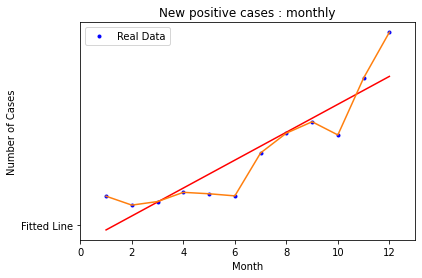

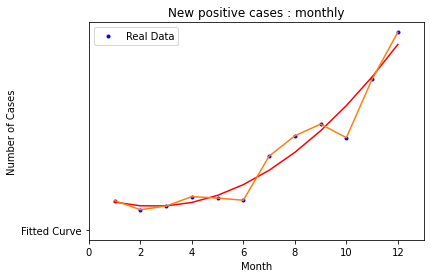

In [111]:
x = np.array([i for i in range(1, 13)])
cases_per_hundred = cases_per_month / 100
y = cases_per_hundred

m, n = np.polyfit(x, y, 1)  
#m = slope, n = intercept
plt.title('New positive cases : monthly')
plt.plot(x, y, 'b.', label = 'Real Data')
plt.plot(x, m * x + n, 'r-', 'Fitted Line')
plt.plot(x, y)
plt.xlim([0, 13])
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

a, b, c = np.polyfit(x, y, 2)

plt.title('New positive cases : monthly')
plt.plot(x, y, 'b.', label = 'Real Data')
plt.plot(x, a * x ** 2 + b * x  + c, 'r-', 'Fitted Curve')
plt.plot(x, y)
plt.xlim([0, 13])
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [112]:
extracted_covid_df[['month', 'people_fully_vaccinated']]

,month,people_fully_vaccinated
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
...,...,...
347,12,41820253.0
348,12,41878501.0
349,12,41939065.0
350,12,NaN
